📊 Dataset Shape: (150000, 12)

🧾 Data Types:
 Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

🔍 Missing Values:
 Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLine

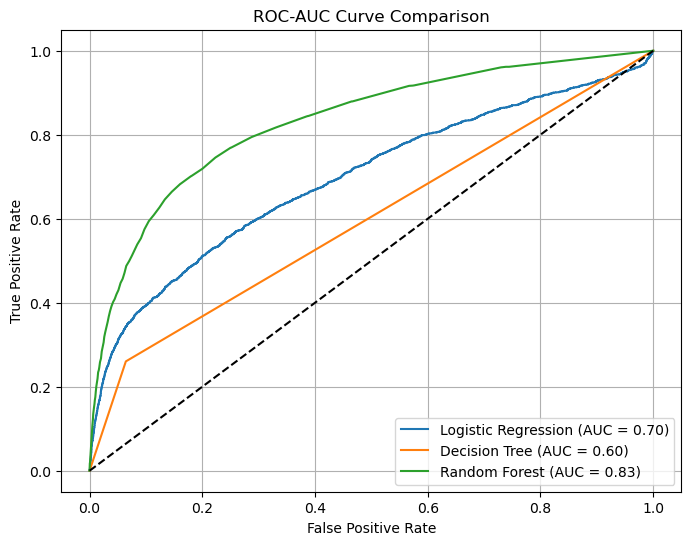


✅ Model Comparison Summary:
                     ROC-AUC Score
Random Forest             0.830267
Logistic Regression       0.695619
Decision Tree             0.597992


In [11]:
# Credit Scoring Model using cs-training dataset

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# ✅ Step 2: Load Dataset
data = pd.read_csv('cs-training.csv')  # <-- your file must be in the same directory

# ✅ Step 3: Initial Exploration
print("📊 Dataset Shape:", data.shape)
print("\n🧾 Data Types:\n", data.dtypes)
print("\n🔍 Missing Values:\n", data.isnull().sum())

# ✅ Step 4: Handle Missing Values
data = data.dropna()  # or use imputation if needed

# ✅ Step 5: Encode Categorical Variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# ✅ Step 6: Feature Engineering (optional - if features exist)
print("\n📋 Available Columns:", data.columns.tolist())
if 'RevolvingUtilizationOfUnsecuredLines' in data.columns and 'DebtRatio' in data.columns:
    data['Utilization_to_DebtRatio'] = data['RevolvingUtilizationOfUnsecuredLines'] / (data['DebtRatio'] + 1)

# ✅ Step 7: Identify Target Column
target_candidates = [col for col in data.columns if col.lower() in ['class', 'target', 'seriousdlqin2yrs']]
target_column = target_candidates[0] if target_candidates else data.columns[0]
print("🎯 Using target column:", target_column)

X = data.drop(columns=[target_column])
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 8: Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 9: Train Models and Evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n📈 {name} Evaluation Report:")
    print(classification_report(y_test, y_pred))
    
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = roc_auc

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# ✅ Step 10: Plot ROC-AUC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 11: Model Performance Summary
summary_df = pd.DataFrame.from_dict(results, orient='index', columns=['ROC-AUC Score'])
summary_df = summary_df.sort_values(by='ROC-AUC Score', ascending=False)
print("\n✅ Model Comparison Summary:")
print(summary_df)

# ✅ End of Project
